In [ ]:
!nvidia-smi

Mon Jun 14 08:01:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      2MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install opacus

     |████████████████████████████████| 102kB 3.0MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
# !pip install torch==1.8.0 torchvision==0.9.0 torchaudio==0.8.0

In [ ]:
# !pip uninstall torchvision
# !pip install torchvision==0.4.0 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
!pip install syft==0.2.9

     |████████████████████████████████| 440kB 3.9MB/s 
     |████████████████████████████████| 9.0MB 17.1MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
     |████████████████████████████████| 204kB 47.1MB/s 
     |████████████████████████████████| 491kB 39.5MB/s 
     |████████████████████████████████| 71kB 8.6MB/s 
     |████████████████████████████████| 1.8MB 37.1MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 4.0MB 43.5MB/s 
     |████████████████████████████████| 753.4MB 22kB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 450kB 33.4MB/s 
     |████████████████████████████████| 133kB 37.1MB/s 
     |████████████████████████████████| 2.0MB 22.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |█

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import pandas as pd 
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

%load_ext tensorboard
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy
import random
import time

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, Dataset

from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils, datasets
from torchsummary import summary
from torch.autograd import Variable


from tqdm import tqdm


# Check assigned GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

# set manual seed for reproducibility
seed = 42

# general reproducibility
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# gpu training specific
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Mon Jun 14 08:04:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive

drive.mount('/gdrive', force_remount = True)

Mounted at /gdrive


In [ ]:
# !pip install numpy

In [ ]:
# !pip install syft==0.2.8

In [ ]:
!gsutil cp -r "/gdrive/My Drive/SVHN3_1.zip" "../SVHN3_1.zip"

Copying file:///gdrive/My Drive/SVHN3_1.zip...
-
Operation completed over 1 objects/140.1 MiB.                                    


In [ ]:
!unzip "../SVHN3_1.zip" -d "../"

Streaming output truncated to the last 5000 lines.
 extracting: ../SVHN3_1/train/7/37483.png  
 extracting: ../SVHN3_1/train/7/35308.png  
 extracting: ../SVHN3_1/train/7/36019.png  
 extracting: ../SVHN3_1/train/7/37018.png  
 extracting: ../SVHN3_1/train/7/35255.png  
 extracting: ../SVHN3_1/train/7/37376.png  
 extracting: ../SVHN3_1/train/7/39337.png  
 extracting: ../SVHN3_1/train/7/36554.png  
 extracting: ../SVHN3_1/train/7/39438.png  
 extracting: ../SVHN3_1/train/7/37900.png  
 extracting: ../SVHN3_1/train/7/39282.png  
 extracting: ../SVHN3_1/train/7/36411.png  
 extracting: ../SVHN3_1/train/7/39836.png  
 extracting: ../SVHN3_1/train/7/35088.png  
 extracting: ../SVHN3_1/train/7/35279.png  
 extracting: ../SVHN3_1/train/7/35928.png  
 extracting: ../SVHN3_1/train/7/39439.png  
 extracting: ../SVHN3_1/train/7/38132.png  
 extracting: ../SVHN3_1/train/7/37442.png  
 extracting: ../SVHN3_1/train/7/38565.png  
 extracting: ../SVHN3_1/train/7/35090.png  
 extracting: ../SVHN3_1/t

In [ ]:
!gsutil cp "/gdrive/My Drive/SVHN_train.csv" "../SVHN3_1_train.csv"
!gsutil cp "/gdrive/My Drive/SVHN_test.csv" "../SVHN3_1_test.csv"

CommandException: No URLs matched: /gdrive/My Drive/SVHN_train.csv
CommandException: No URLs matched: /gdrive/My Drive/SVHN_test.csv


In [ ]:
!ls "../"

bin	 etc	 lib64	root	 SVHN3_1_test.csv   tmp
boot	 gdrive  media	run	 SVHN3_1_train.csv  tools
content  home	 mnt	sbin	 SVHN3_1.zip	    usr
datalab  lib	 opt	srv	 sys		    var
dev	 lib32	 proc	SVHN3_1  tensorflow-1.15.2


# PREPROCESS

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../SVHN3_1/train/"):
  for n in os.listdir("../SVHN3_1/train/"+file):
    pathlist.append("../SVHN3_1/train/"+file+"/"+n)
    label.append(int(file))    

In [ ]:
len(label)

47107

In [ ]:
len(pathlist)

47107

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../SVHN3_1/train/5/26662.png,5
1,../SVHN3_1/train/5/29216.png,5
2,../SVHN3_1/train/5/26062.png,5
3,../SVHN3_1/train/5/28640.png,5
4,../SVHN3_1/train/5/29063.png,5


In [ ]:
len(df)

47107

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/SVHN3_1_train.csv')
df.to_csv('../SVHN3_1_train.csv')
#files.download('../gdrive/My Drive/.csv')

In [ ]:
new_dict = {}

In [ ]:
l = ["Paths", "Labels"]

In [ ]:
new_dict = dict(zip(new_dict, l))
new_dict

{}

In [ ]:
new_dict.update(dict(zip(new_dict, l)))
new_dict

{}

In [ ]:
pathlist = []
label = []

for file in os.listdir("../SVHN3_1/test/"):
  for n in os.listdir("../SVHN3_1/test/"+file):
    pathlist.append("../SVHN3_1/test/"+file+"/"+n)
    label.append(int(file))    

In [ ]:

len(label)

9500

In [ ]:
len(pathlist)

9500

In [ ]:
data = {
   'Paths': [],
   'Labels': []
}
df = pd.DataFrame(data)

df['Paths'] = pathlist
df['Labels'] = label

df.head(5)

,Paths,Labels
0,../SVHN3_1/test/5/5788.png,5
1,../SVHN3_1/test/5/5627.png,5
2,../SVHN3_1/test/5/5792.png,5
3,../SVHN3_1/test/5/5071.png,5
4,../SVHN3_1/test/5/5583.png,5


In [ ]:
len(df)

9500

In [ ]:
from google.colab import files

df.to_csv('../gdrive/My Drive/SVHN3_1_test.csv')
df.to_csv('../SVHN3_1_test.csv')
#files.download('../gdrive/My Drive/.csv')

# START

In [ ]:
# import torch.nn as nn
# import torch.nn.functional as F


# class Model(nn.Module):
#     """Class used to initialize model of student/teacher"""

#     def __init__(self):

#         super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(3, 96, 3, 1)
#         self.conv2 = nn.Conv2d(96, 96, 3, 1)
#         self.conv3 = nn.Conv2d(96, 96, 3, 1)
#         self.bn1 = nn.BatchNorm2d(96)
#         self.conv4 = nn.Conv2d(96, 192, 3, 1)
#         self.conv5 = nn.Conv2d(192, 192, 3, 1)
#         self.conv6 = nn.Conv2d(192, 192, 3, 1)
#         self.conv7 = nn.Conv2d(192, 192, 5, 1)
#         self.bn2 = nn.BatchNorm2d(192)
#         self.fc1 = nn.Linear(2 * 2 * 192, 500)
#         self.fc2 = nn.Linear(500, 10)

#     def forward(self, x):

#         x = F.relu(self.conv1(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn1(x)
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn1(x)
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn1(x)
#         x = F.dropout(x, 0.3)
#         x = F.relu(self.conv4(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn2(x)
#         x = F.relu(self.conv5(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn2(x)
#         x = F.relu(self.conv6(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn2(x)
#         x = F.dropout(x, 0.3)
#         x = F.relu(self.conv7(x))
#         x = F.max_pool2d(x, 3, 1)
#         x = self.bn2(x)
#         # print(x.shape)
#         x = x.view(-1, 2 * 2 * 192)
#         # print(x.shape)
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return F.log_softmax(x, dim=1)

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])


def test():
    net = ResNet18()
    y = net(torch.randn(1, 3, 32, 32))
    print(y.size())

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
import opacus 
from opacus import PrivacyEngine

class Student:
    """Implementation of Student models
       The student model is trained from the public data labelled by teacher ensembles.
       The teacher ensembles were trained using sensitive data. The student model is further
       used to make predictions on public data.
       Args:
           args[Arguments obj]: Object of arguments class used to control hyperparameters
           model[torch model]: Model of Student 
    """

    def __init__(self, args, model):

        self.args = args
        self.model = model

    def predict(self, data):
        """Function which accepts unlabelled public data and labels it using 
           teacher's model.
           Args:
               model[torch model]: Teachers model
               data [torch tensor]: Public unlabelled data
           Returns:
               dataset[Torch tensor]: Labelled public dataset
        """

        return torch.max(self.model(data), 1)[1]

    def train(self, dataset):
        """Function to train the student model.
           Args:
               dataset[torch dataset]: Dataset using which model is trained.
        """

        for epoch in range(0, self.args.student_epochs):
            self.loop_body(dataset, epoch)

    def loop_body(self, dataset, epoch):
        """Body of the training loop.
           Args:
               dataset: dataset which is used to train the model.
               epoch: Epoch for which the model is being trained.
        """

        optimizer = optim.SGD(self.model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        batch_size = sample_size = 128
        criterion=nn.CrossEntropyLoss()
        
        # if epoch == 1:
        #   privacy_engine = PrivacyEngine(
        #       model,
        #       batch_size = batch_size,
        #       sample_size = sample_size,
        #       alphas=[10, 100],
        #       noise_multiplier= 12,
        #       max_grad_norm = 1.0,
        #       target_delta = 1e-22,
        #   )
        #   privacy_engine.attach(optimizer)
        self.model = self.model.cuda()
        for (data, target) in dataset:
            data, target = data.cuda(), target.cuda() 
            optimizer.zero_grad()
            output = self.model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        print("\n")
        print(f"EPOCH {epoch}\t\tLoss: {loss.item()}")
        # print(epoch)
        # print("\n")
        # print("Loss")
        # print(loss.item())

    def save_model(self):
        torch.save(self.model.state_dict(), "Models/" + "student_model")

In [ ]:
def split(dataset, batch_size, split=0.2):
    """Splits the given dataset into training/validation.
       Args:
           dataset[torch dataloader]: Dataset which has to be split
           batch_size[int]: Batch size
           split[float]: Indicates ratio of validation samples
       Returns:
           train_set[list]: Training set
           val_set[list]: Validation set
    """

    index = 0
    length = len(dataset)

    train_set = []
    val_set = []

    for data, target in dataset:
        if index <= (length * split):
            train_set.append([data, target])
        else:
            val_set.append([data, target])

        index += 1

    return train_set, val_set


def accuracy(predictions, dataset):
    """Evaluates accuracy for given set of predictions and true labels.
       Args:
           predictions[torch tensor]: predictions made by classifier.
           labels[torch tensor]: true labels of the dataset.
       Returns:
           accuracy[float]: accuracy of classifier.
    """
    # predictions, dataset = predictions.cuda(), dataset.cuda()
    total = 0.0
    correct = 0.0
    for j in range(0, len(dataset)):
        correct += (predictions[j].cpu().long() == dataset[j].cpu().long()).sum().item()
        total += len(dataset[j])
    return (correct / total) * 100

def plot(x, y):
    """Plots a graph of given x and y.
       Args:
           
           x:
           y:
    """
    pass


def histogram(x, y):
    """Plots a histogram for corresponding x and y:
       Args:
           
           x:
           y:
    """

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions.laplace import Laplace
#from util import accuracy
from syft.frameworks.torch.dp import pate

class Teacher:
    """Implementation of teacher models.
       Teacher models are ensemble of models which learns directly disjoint splits of the sensitive data
       The ensemble of teachers are further used to label unlabelled public data on which the student is 
       trained. 
       Args:"
           args[Arguments object]: An object of Arguments class with required hyperparameters
           n_teachers[int]: Number of teachers
           epochs[int]: Number of epochs to train each model
    """

    def __init__(self, args, model, n_teachers=1, epsilon=0.5):

        self.n_teachers = n_teachers
        self.model = model
        self.models = {}
        self.args = args
        self.init_models()
        self.epsilon = epsilon

    def init_models(self):
        """Initialize teacher models according to number of required teachers"""

        name = "model_"
        for index in range(0, self.n_teachers):

            model = self.model()
            self.models[name + str(index)] = model

    def addnoise(self, x):
        """Adds Laplacian noise to histogram of counts
           Args:
                counts[torch tensor]: Histogram counts
                epsilon[integer]:Amount of Noise
           Returns:
                counts[torch tensor]: Noisy histogram of counts
        """

        m = Laplace(torch.tensor([0.0]), torch.tensor([self.epsilon]))
        count = x + m.sample()

        return count

    def split(self, dataset):
        """Function to split the dataset into non-overlapping subsets of the data
           Args:
               dataset[torch tensor]: The dataset in the form of (image,label)
           Returns:
               split: Split of dataset
        """

        ratio = int(len(dataset) / self.n_teachers)
        iters = 0
        index = 0
        split = []
        last_batch = ratio * self.n_teachers

        for teacher in range(0, self.n_teachers):

            split.append([])

        for (data, target) in dataset:
            if (iters) % ratio == 0 and iters != 0:

                index += 1

            split[index].append([data, target])
            iters += 1

            if iters == last_batch:
                return split

        return split

    def train(self, dataset):
        """Function to train all teacher models.
           Args:
                dataset[torch tensor]: Dataset used to train teachers in format (image,label)
        """

        split = self.split(dataset)
        # print(self.args.epochs)
        
        for epoch in range(1, self.args.epochs + 1):
            
            # print("EPOCH: ", epoch)
            index = 0
            for model_name in self.models:

                # print("TRAINING ", model_name)
                
                self.loop_body(split[index], model_name, epoch)
                index += 1

    def loop_body(self, split, model_name, epoch):
        """Body of the training loop.
           Args:
               split: Split of the dataset which the model has to train.
               model_name: Name of the model.
               epoch: Epoch for which the model is being trained.
        """

        model = self.models[model_name].cuda()
        optimizer = optim.SGD(model.parameters(), lr=self.args.lr, momentum=self.args.momentum)
        iters = 0
        loss = 0.0
        criterion=nn.CrossEntropyLoss()
        for (data, target) in split:
            data, target = data.cuda(), target.cuda()
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            iters += 1
        # Print loss by making using of log intervals
        # print(f"Training {model_name}\t\tLoss: {loss.item()}")
        # print(loss.item())

    def aggregate(self, model_votes, batch_size):
        """Aggregate model output into a single tensor of votes of all models.
           Args:
                votes: Model output
                n_dataset: Number of datapoints
           Returns:
                counts: Torch tensor with counts across all models    
           """

        counts = torch.zeros([batch_size, 10])
        model_counts = torch.zeros([self.args.n_teachers, batch_size])
        model_index = 0

        for model in model_votes:

            index = 0

            for tensor in model_votes[model]:
                for val in tensor:

                    counts[index][val] += 1
                    model_counts[model_index][index] = val
                    index += 1

            model_index += 1

        return counts, model_counts

    def save_models(self):
        no = 0
        for model in self.models:

            torch.save(self.models[model].state_dict(), "/gdrive/My Drive/PATE_Teacher/" + model)
            no += 1

        print("\n")
        print("MODELS SAVED")
        print("\n")

    def load_models(self):

        path_name = "model_"

        for i in range(0, self.args.n_teachers):

            modelA = self.model()
            self.models[path_name + str(i)] = torch.load("/gdrive/My Drive/PATE_Teacher/" + path_name + str(i))
            self.models[path_name + str(i)] = modelA.load_state_dict()

    def analyze(self, preds, indices, moments=8):

        datadepeps, dataindeps = pate.perform_analysis_torch(
            preds, indices, noise_eps = 0.7 * 1e-2, delta= 1e-6, moments=moments, beta=0.09
        ) # increase noise_eps and fix delta
        return datadepeps, dataindeps

    def predict(self, data):
        """Make predictions using Noisy-max using Laplace mechanism.
           Args:
                data: Data for which predictions are to be made
           Returns:
                predictions: Predictions for the data
        """

        model_predictions = {}

        for model in self.models:
            self.models[model] = self.models[model].cuda()
            out = []
            output = self.models[model](data)
            output = output.max(dim=1)[1]
            out.append(output)

            model_predictions[model] = out

        counts, model_counts = self.aggregate(model_predictions, len(data))
        counts = counts.apply_(self.addnoise)

        predictions = []

        for batch in counts:

            predictions.append(torch.tensor(batch.max(dim=0)[1].long()).clone().detach())

        output = {"predictions": predictions, "counts": counts, "model_counts": model_counts}

        return output

In [ ]:
print(torch.__version__)

1.4.0


In [ ]:
!python3 --version

Python 3.7.10


In [ ]:
# !sudo apt upgrade python

In [ ]:
# !sudo apt-get update 

In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import numpy as np
import os

# def load_data(train, batch_size):
#     """Helper function used to load the train/test data.
#        Args:
#            train[boolean]: Indicates whether its train/test data.
#            batch_size[int]: Batch size
#     """

#     dataset_mnist = datasets.MNIST(
#             "../data",
#             train=train,
#             download=True,
#             transform=transforms.Compose(
#                 [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]
#             ),
#         )
#     classes, class_counts = np.unique(dataset_mnist.targets, return_counts=True)
#     nb_classes = len(classes)
#     if train == True:
#       # imbal_class_counts = [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 500, 6000]

#       # # Get class indices
#       # class_indices = [np.where(np.array(dataset_mnist.targets) == i)[0] for i in range(nb_classes)]

#       # # Get imbalanced number of instances
#       # imbal_class_indices = [class_idx[:class_count] for class_idx, class_count in zip(class_indices, imbal_class_counts)]
#       # imbal_class_indices = np.hstack(imbal_class_indices)
#       # #print(type(imbal_class_indices))
#       # #print(imbal_class_indices[0:2])


#       # # Set target and data to dataset
#       # dataset_mnist.targets = np.array(dataset_mnist.targets)[imbal_class_indices]
#       # dataset_mnist.data = dataset_mnist.data[imbal_class_indices]


#       data_dir = '/content/drive/My Drive/MNIST'

#       dataset_mnist = []

#       for label in os.listdir(data_dir):
#         for img in os.listdir(os.path.join(data_dir, label)):
#           dataset_mnist.append((img, label))

#     loader = torch.utils.data.DataLoader(
#         dataset_mnist,
#         batch_size=batch_size,
#         shuffle=True,
#     )

#     return loader


class NoisyDataset(Dataset):
    """Dataset with targets predicted by ensemble of teachers.
       Args:
            dataloader (torch dataloader): The original torch dataloader.
            model(torch model): Teacher model to make predictions.
            transform (callable, optional): Optional transform to be applied on a sample.
    """

    def __init__(self, dataloader, predictionfn, transform=None):
        self.dataloader = dataloader
        self.predictionfn = predictionfn
        self.transform = transform
        self.noisy_data = self.process_data()

    def process_data(self):
        """
        Replaces original targets with targets predicted by ensemble of teachers.
        Returns:
            noisy_data[torch tensor]: Dataset with labels predicted by teachers
            
        """

        noisy_data = []

        for data, _ in self.dataloader:
            data = data.cuda()
            noisy_data.append([data, torch.tensor(self.predictionfn(data)["predictions"])])

        return noisy_data

    def __len__(self):
        return len(self.dataloader)

    def __getitem__(self, idx):

        sample = self.noisy_data[idx]

        if self.transform:
            sample = self.transform(sample)

        return sample

In [ ]:
# # len(test_loader.dataset.data)
# import matplotlib.pyplot as plt

# train_loader = load_data(True, 32)


# for (label, img) in train_loader:
#   print(label)
#   plt.imshow(img)
#   plt.show()

In [ ]:
from PIL import Image

In [ ]:
class CustomDatasetFromCsvData(Dataset):
    def __init__(self, csv_path, transform=None):
        """
        Custom dataset example for reading data from csv
        Args:
            csv_path (string): path to csv file
            height (int): image height
            width (int): image width
            transform: pytorch transforms for transforms and tensor conversion
        """
        self.data = pd.read_csv(csv_path)
        self.paths = self.data['Paths']
        self.labels = np.asarray(self.data['Labels'])
        #self.height = height
        #self.width = width
        self.transform = transform

    def __getitem__(self, index):
        single_image_label = self.labels[index]
        # Read each 784 pixels and reshape the 1D array ([784]) to 2D array ([28,28])
        img_as_np = Image.open(self.paths[index])
        img_as_np = np.reshape(img_as_np, (32, 32, 3))
        #img_as_np = np.asarray(self.data.iloc[index][1:]).reshape(28, 28).astype('uint8')
        # Convert image from numpy array to PIL image, mode 'L' is for grayscale
        img_as_img = Image.fromarray(img_as_np)
        #img_as_img = img_as_img.convert('L')
        # Transform image to tensor
        if self.transform is not None:
            img_as_tensor = self.transform(img_as_img)
        #img_as_tensor = Variable(img_as_tensor)
        #single_image_label = Variable(torch.Tensor(single_image_label))
        # Return image and the label
        return (img_as_tensor, single_image_label)

    def __len__(self):
        return len(self.data.index)

In [ ]:
# #train_loader = DataLoader(CustomDataset('../gdrive/My Drive/MNIST/'), batch_size=32, shuffle=True)

# transformations_train = transforms.Compose([
#                                       transforms.ToTensor(),                                      
#                                       transforms.Normalize((0.5,), (0.5,))
#                                     ])
# transformations_test = transforms.Compose([
#                                       transforms.RandomCrop(28, padding=4),
#                                       transforms.Grayscale(num_output_channels=1),
#                                       transforms.ToTensor(),
#                                       transforms.Normalize((0.5,), (0.5,))
#                                     ])

# mnist_train_data = CustomDatasetFromCsvData('../SVHN3_1_train.csv', transformations_train)

In [ ]:
# mnist_test_data = CustomDatasetFromCsvData('../SVHN3_1_test.csv', transformations_train)

In [ ]:
transforms_svhn = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

PATH_TO_CIFAR3 = '../SVHN3_1'

trainset = datasets.ImageFolder(root=PATH_TO_CIFAR3+'/train',transform=transforms_svhn)
testset = datasets.ImageFolder(root=PATH_TO_CIFAR3+'/test',transform=transforms_svhn)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:209: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Accuracy:  69.53125
Accuracy:  71.484375
Accuracy:  70.83333333333334
Accuracy:  70.3125
Accuracy:  69.375
Accuracy:  67.578125
Accuracy:  68.19196428571429
Accuracy:  68.45703125
Accuracy:  69.01041666666666
Accuracy:  69.140625
Accuracy:  68.39488636363636
Accuracy:  68.75
Accuracy:  68.56971153846155
Accuracy:  67.96875
Accuracy:  67.70833333333334
Accuracy:  67.3828125
Accuracy:  67.87683823529412
Accuracy:  68.05555555555556
Accuracy:  68.33881578947368
Accuracy:  68.3203125
Accuracy:  67.96875
Accuracy:  68.03977272727273
Accuracy:  67.93478260869566
Accuracy:  67.96875
Accuracy:  67.75
Accuracy:  67.6983173076923
Accuracy:  67.85300925925925
Accuracy:  67.88504464285714
Accuracy:  67.80711206896551
Accuracy:  68.02083333333333
Accuracy:  68.17036290322581
Accuracy:  67.96875
Accuracy:  68.03977272727273
Accuracy:  68.06066176470588
Accuracy:  67.90178571428571
Accuracy:  67.90364583333334
Accuracy:  68.05320945945947
Accuracy:  67.92763157894737
Accuracy:  67.86858974358975
Accu

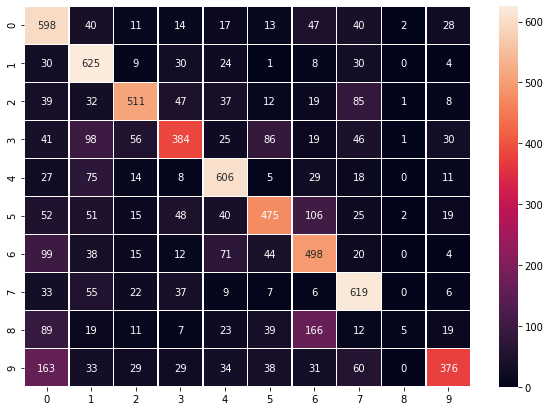

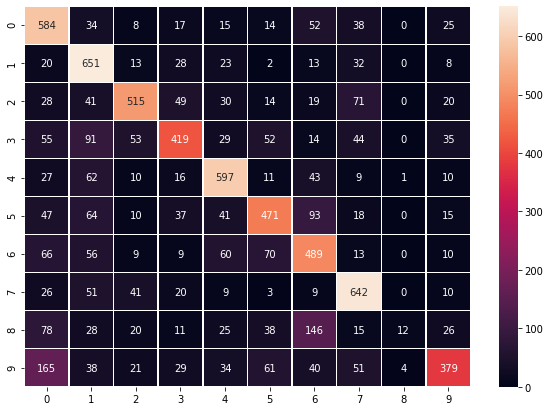

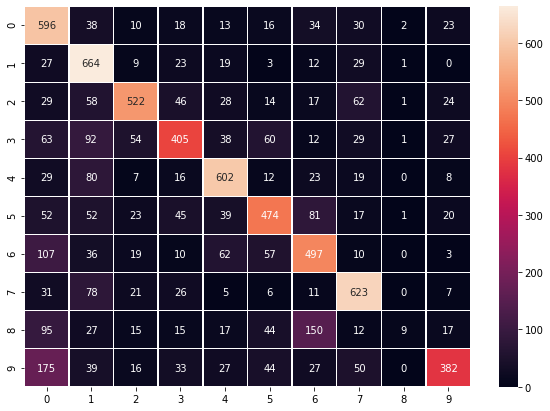

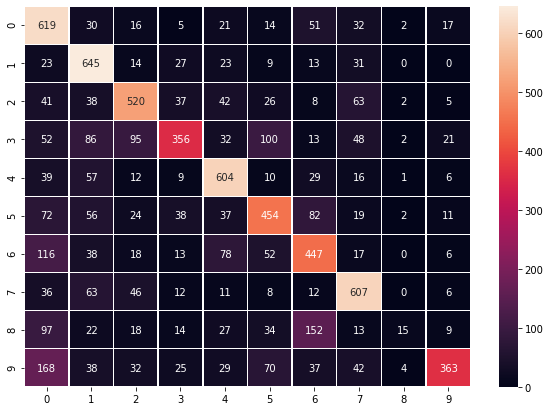

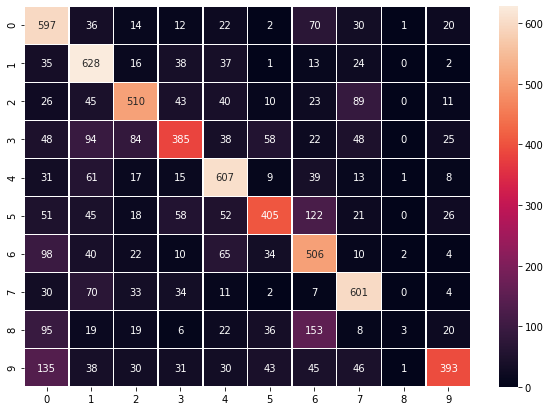

In [ ]:
# Required imports
import torch
#from Teacher import Teacher
#from Model import Model
#from data import load_data, NoisyDataset
#from util import accuracy, split
#from Student import Student
import syft as sy
from syft.frameworks.torch.dp import pate
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn


class Arguments:

    # Class used to set hyperparameters for the whole PATE implementation
    def __init__(self):

        self.batchsize = 128
        self.test_batchsize = 128
        self.epochs = 50
        self.student_epochs = 30
        self.lr = 0.05
        self.momentum = 0.5
        self.no_cuda = False
        self.seed = 1
        self.log_interval = 30
        self.n_teachers = 50
        self.save_model = False


args = Arguments()

class_accuracies = []
#train_loader = load_data(True, args.batchsize)
#test_loader = load_data(False, args.test_batchsize)

for i in range(5):
  train_loader = torch.utils.data.DataLoader(dataset=trainset, batch_size=args.batchsize, shuffle=True, drop_last = True)
  test_loader = torch.utils.data.DataLoader(dataset=testset, batch_size=args.test_batchsize, shuffle=True, drop_last = True)


  # Declare and train teachers on MNIST training data
  teacher = Teacher(args, ResNet18, n_teachers=args.n_teachers)
  teacher.train(train_loader)

  # if i == 0:
  #   teacher.save_models()

  # Evaluate Teacher accuracy
  teacher_targets = []
  predict = []

  counts = []
  original_targets = []

  # print(f'Iteration {i}\n\n')



  for data, target in test_loader:
      data, target = data.cuda(), target.cuda()
      output = teacher.predict(data)

      arr_target = []
      teacher_targets.append(target)
      original_targets.append(target)
      predict.append(output["predictions"])
      counts.append(output["model_counts"])
      print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("Accuracy: ", accuracy(torch.tensor(predict), teacher_targets))

  print("\n")
  print("\n")

  print("Training Student")

  print("\n")
  print("\n")

  # Split the test data further into training and validation data for student
  train, val = split(test_loader, args.batchsize)

  student = Student(args, ResNet18())
  N = NoisyDataset(train, teacher.predict)
  student.train(N)

  results = []
  targets = []

  total = 0.0
  correct = 0.0

  for data, target in val:
      data, target = data.cuda(), target.cuda()
      predict_lol1 = student.predict(data)
      correct += float((predict_lol1 == (target)).sum().item())
      total += float(target.size(0))

  print("Private Baseline: ", (correct / total) * 100)

  counts_lol = torch.stack(counts).contiguous()
  # print(counts_lol.shape)
  counts_lol = counts_lol.view(50, 128*74)
  predict_lol = torch.tensor(predict).view(128*74)
  data_dep_eps, data_ind_eps = teacher.analyze(counts_lol, predict_lol, moments= 20)
  print(f"Dependent Epsilon: {data_dep_eps}\nIndependent Epsilon: {data_ind_eps}")

  targets_1 = []
  predict_1 = []

  for data, target in val:
    data, target = data.cuda(), target.cuda()
    predict_1.append(student.predict(data))
    targets_1.append(target)

  for i in range(len(targets_1)):
    targets_1[i] = targets_1[i].cpu()
    predict_1[i] = predict_1[i].cpu()
  ### Class-Wise Accuracy of the predictions on the base model


  conf_mat=confusion_matrix(np.concatenate(targets_1), np.concatenate(predict_1))
  # print(conf_mat)
  class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
  # print(class_accuracy)
  class_accuracies.append(class_accuracy)


  df_cm = pd.DataFrame(conf_mat, index = [i for i in "0123456789"],
                    columns = [i for i in "0123456789"])
  plt.figure(figsize = (10,7))
  print(sn.heatmap(df_cm, annot=True, fmt= 'd', linewidths=.5))

  print(class_accuracy)

  # class_accuracies.append(class_accuracy)

In [ ]:

# print(counts_lol[:10, :100])
# print("\n", predict_lol[:1000])

In [ ]:
for acc in class_accuracies:
  print(acc)

[77.9040404  78.44611529 78.38541667 64.11837238 82.63090677 67.45341615
 69.25925926 83.64312268 25.12953368 69.06565657]
[77.55359395 82.97331639 77.46835443 71.15384615 82.46505718 67.19706242
 70.5        84.65408805 25.12315271 69.76160602]
[78.38164251 81.73690932 80.8988764  68.96984925 82.13836478 71.94337194
 68.60025221 84.18367347 23.69077307 72.67002519]
[78.86792453 82.76299113 73.75621891 64.17177914 85.22292994 70.16861219
 68.52540273 83.78712871 26.44836272 67.98975672]
[80.38216561 81.39825218 78.24427481 70.3379224  82.15189873 68.46057572
 67.3992674  81.95302843 27.69230769 72.35142119]
